# **Model Development**



In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset



In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [5]:
#you will need to download the dataset;
await download(path, "laptops.csv")
file_name="laptops.csv"

In [6]:
df = pd.read_csv(file_name, header=0)

In [7]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Single Linear Regression

"CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [12]:
lm = LinearRegression()
x = df[['CPU_frequency']]
y = df['Price']
lm.fit(x,y)
yhat = lm.predict(x)
yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


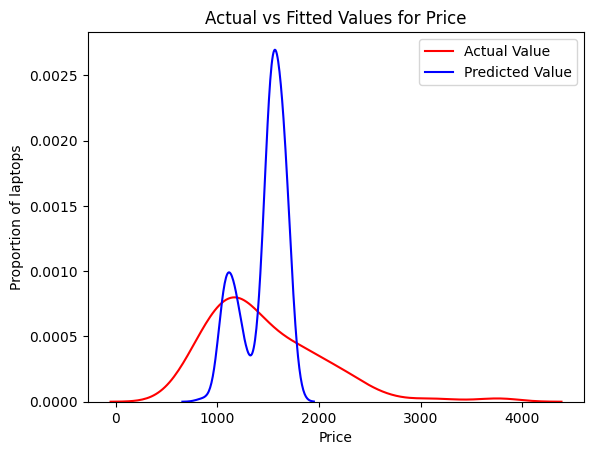

In [19]:
# Write your code below and press Shift+Enter to execute 
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual value')

sns.distplot(yhat, hist=False, color='b', label='Fitted values', ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model. 


In [25]:
# Write your code below and press Shift+Enter to execute 
mse_slr = mean_squared_error(df['Price'], yhat)
r2_score_slr = lm.score(x, y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.13444363210243238
The mean square error of price and predicted value is:  284583.44058686297


# Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [27]:
lm1 = LinearRegression()
z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU',]]
lm1.fit(z,df['Price'])
y_hat = lm1.predict(z)
y_hat[0:10]

array([1194.0008278 ,  709.8619509 , 1672.4030845 , 1171.68683349,
       1463.32604879, 1128.02154877, 1259.98010683,  861.79557442,
       1070.87261014, 1529.30532782])

Plot the Distribution graph of the predicted values as well as the Actual values


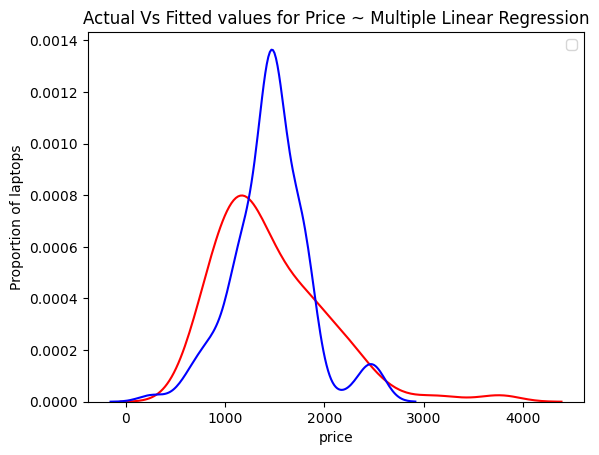

In [30]:
# Write your code below and press Shift+Enter to execute
ax1 = sns.distplot(df['Price'], hist=False, color='r', label = "Actual value")

# predicted value
sns.distplot(y_hat, hist=False, color='b', label = 'Fitted Value', ax=ax1)

plt.title('Actual Vs Fitted values for Price ~ Multiple Linear Regression')
plt.xlabel('price')
plt.ylabel('Proportion of laptops')
plt.legend('Actual' , 'Fitted')

plt.show()

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [37]:
# Write your code below and press Shift+Enter to execute
MSE = mean_squared_error(df['Price'], y_hat)
R_square = lm1.score(z,y)
print('Mean Square Error = ', MSE ,'\nR^2 = ', R_square)

Mean Square Error =  181597.71347894325 
R^2 =  0.4476732132649842


# Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [53]:
#  Write your code below and press Shift+Enter to execute
x= df['CPU_frequency']
y = df['Price']
x = x.to_numpy().flatten()
f1 = np.polyfit(x,y,1)
p1 = np.poly1d(f1)

f2 = np.polyfit(x,y,3)
p2 = np.poly1d(f2)

f3 = np.polyfit(x,y,5)
p3 = np.poly1d(f3)

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [54]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


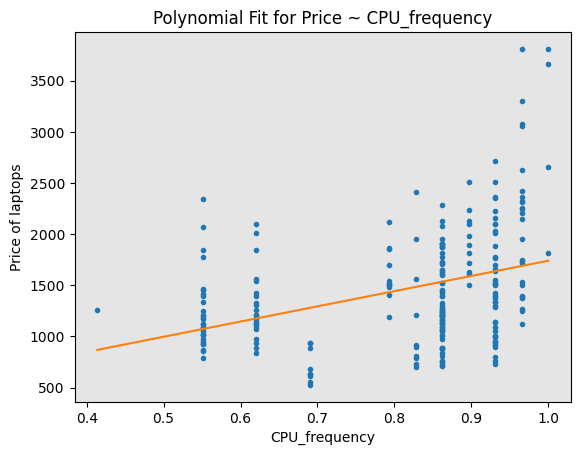

In [55]:
# Call for function of degree 1
PlotPolly(p1,x,y,'CPU_frequency')

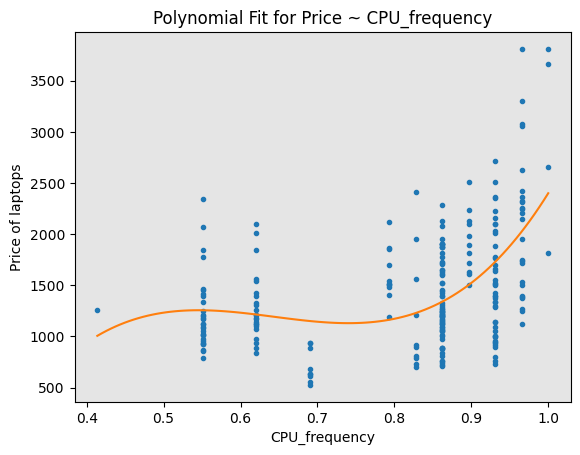

In [56]:
# Call for function of degree 3
PlotPolly(p2,x,y,'CPU_frequency')

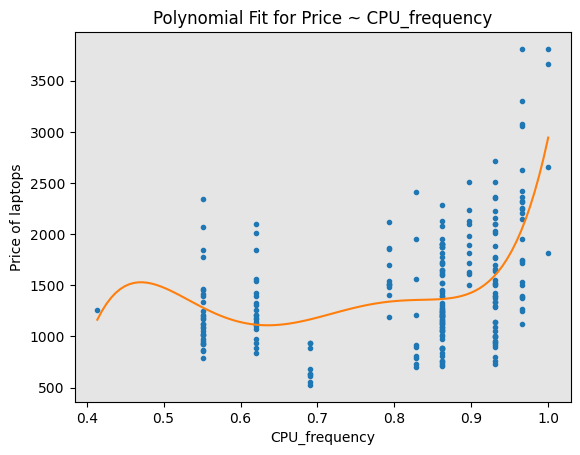

In [57]:
# Call for function of degree 5
PlotPolly(p3,x,y,'CPU_frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [62]:
r_squared_1 = r2_score(y, p1(x))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(y,p1(x)))
r_squared_3 = r2_score(y, p2(x))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(y,p3(x)))
r_squared_5 = r2_score(y, p3(x))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(y,p3(x)))

The R-square value for 1st degree polynomial is:  0.13444363210243282
The MSE value for 1st degree polynomial is:  284583.4405868628
The R-square value for 3rd degree polynomial is:  0.26692640796530986
The MSE value for 3rd degree polynomial is:  229137.29548053825
The R-square value for 5th degree polynomial is:  0.3030822706443803
The MSE value for 5th degree polynomial is:  229137.29548053825


# Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


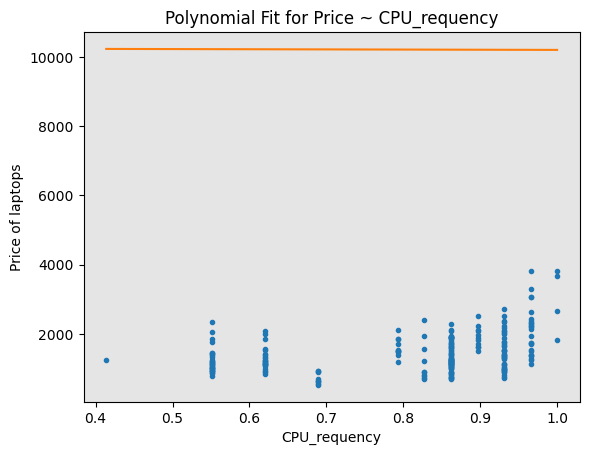

In [76]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)

f4 = np.polyfit(ypipe,y,6)
p4 = np.poly1d(f4)

PlotPolly(p4,x,y,'CPU_requency')

Evaluate the MSE and R^2 values for the this predicted output.


In [66]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(y, ypipe))

MSE for multi-variable polynomial pipeline is:  150846.51890756303
R^2 for multi-variable polynomial pipeline is:  0.5412025213189819


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.
